# **Ploteo en coordenadas ecuatoriales de ubicaciones**

In [ ]:
!pip install astroquery
!pip install alerce

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.1/11.1 MB 43.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 994.8/994.8 kB 36.4 MB/s eta 0:00:00


In [ ]:
from alerce.core import Alerce
alerce=Alerce()
import numpy as np; import matplotlib.pyplot as plt
import sys ; import pandas as pd
import seaborn as sns; import os
import requests; import astropy.units as u

from astropy import coordinates
from astropy.time import Time
from astropy.table import Table, Column
from astropy.coordinates import Distance, Galactic, SkyCoord
from astropy.cosmology import WMAP7
from astroquery.ipac.irsa.irsa_dust import IrsaDust
from astroquery.ned import Ned
from IPython.display import HTML
from ipywidgets import Layout, Box, widgets


<ipython-input-5-cdf4629d0e25>:14: DeprecationWarning: the ``ned`` module has been moved to astroquery.ipac.ned, please update your imports.
  from astroquery.ned import Ned


In [ ]:
clasificaciones= alerce.query_classifiers()
print(clasificaciones)

[{'classifier_name': 'lc_classifier_transient', 'classifier_version': 'hierarchical_random_forest_1.0.0', 'classes': ['SNIa', 'SNIbc', 'SNII', 'SLSN']}, {'classifier_name': 'lc_classifier_stochastic', 'classifier_version': 'hierarchical_random_forest_1.0.0', 'classes': ['QSO', 'AGN', 'Blazar', 'CV/Nova', 'YSO']}, {'classifier_name': 'lc_classifier_periodic', 'classifier_version': 'hierarchical_random_forest_1.0.0', 'classes': ['LPV', 'E', 'DSCT', 'RRL', 'CEP', 'Periodic-Other']}, {'classifier_name': 'LC_classifier_ATAT_forced_phot(beta)', 'classifier_version': 'beta', 'classes': ['SNIa', 'SNIbc', 'SNIIb', 'SNII', 'SNIIn', 'SLSN', 'TDE', 'Microlensing', 'QSO', 'AGN', 'Blazar', 'YSO', 'CV/Nova', 'LPV', 'EA', 'EB/EW', 'Periodic-Other', 'RSCVn', 'CEP', 'RRLab', 'RRLc', 'DSCT']}, {'classifier_name': 'LC_classifier_BHRF_forced_phot(beta)', 'classifier_version': 'beta', 'classes': ['SNIa', 'SNIbc', 'SNIIb', 'SNII', 'SNIIn', 'SLSN', 'TDE', 'Microlensing', 'QSO', 'AGN', 'Blazar', 'YSO', 'CV/Nov

In [ ]:
# Getting classes for a classifier and version
classes = alerce.query_classes("lc_classifier",
"hierarchical_random_forest_1.0.0")
print(classes)


[{'name': 'SNIa'}, {'name': 'SNIbc'}, {'name': 'SNII'}, {'name': 'SLSN'}, {'name': 'QSO'}, {'name': 'AGN'}, {'name': 'Blazar'}, {'name': 'CV/Nova'}, {'name': 'YSO'}, {'name': 'LPV'}, {'name': 'E'}, {'name': 'DSCT'}, {'name': 'RRL'}, {'name': 'CEP'}, {'name': 'Periodic-Other'}]


In [ ]:
#Definir cefeidas

min_firstmjd = Time("2017-11-01T00:00:00", format="isot", scale="utc").mjd

CEPs = alerce.query_objects(classifier="lc_classifier",
                           class_name="CEP",
                           probability=0.7,
                           ndet=[30, 200],
                           order_by="probability",
                           order_mode="DESC",
                           first_mjd=[min_firstmjd, None],
                           count=False,
                           page_size=1000, format='pandas')

CEPs.set_index("oid", inplace=True)

#Definir RR Lyrae

RRs = alerce.query_objects(classifier="lc_classifier",
                           class_name="RRL",
                           probability=0.7,
                           ndet=[30, 200],
                           order_by="probability",
                           order_mode="DESC",
                           first_mjd=[min_firstmjd, None],
                           count=False,
                           page_size=1000, format='pandas')

RRs.set_index("oid", inplace=True)


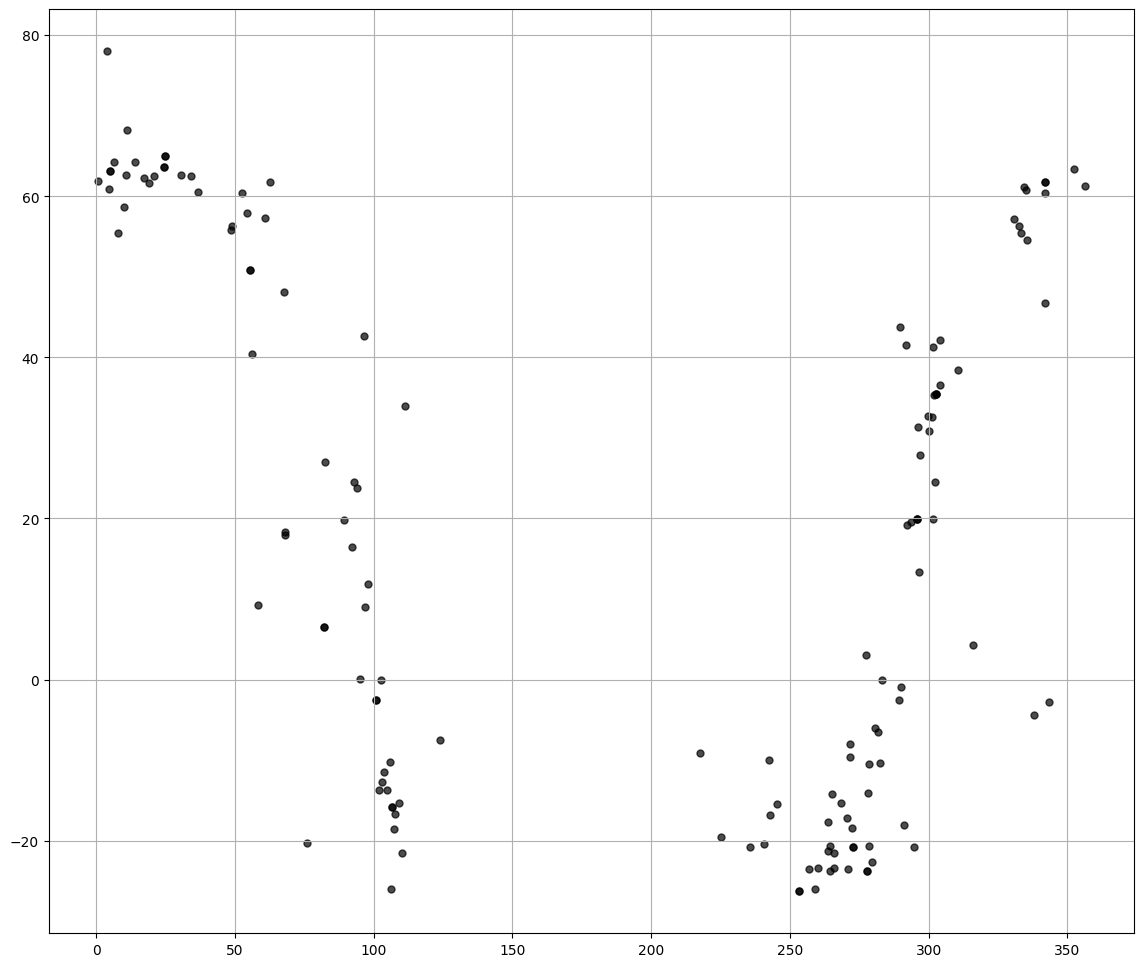

In [ ]:
#Coordenadas ecuatoriales

plt.figure(figsize=(14,12))
plt.scatter(CEPs.meanra,CEPs.meandec,c="black",alpha=0.7,s=25)
plt.grid()
plt.show()

In [ ]:
cep_ar=CEPs["meanra"].values
cep_dec=CEPs["meandec"].values

rr_ar=RRs["meanra"].values
rr_dec=RRs["meandec"].values



In [ ]:
def equatorial_to_galactic(ra,dec):
  ra_rad=np.radians(ra)
  dec_rad=np.radians(dec)

  X_eq= np.cos(ra_rad)*np.cos(dec_rad)
  Y_eq= np.sin(ra_rad)*np.cos(dec_rad)
  Z_eq= np.sin(dec_rad)

  l_rad=np.arctan2(Y_eq,X_eq)
  b_rad=np.arcsin(Z_eq/np.sqrt(X_eq**2+Y_eq**2+Z_eq**2))

  l=np.degrees(l_rad)
  b=np.degrees(b_rad)

  return l,b

In [ ]:
cep_l,cep_b=equatorial_to_galactic(cep_ar,cep_dec)
rr_l,rr_b=equatorial_to_galactic(rr_ar,rr_dec)

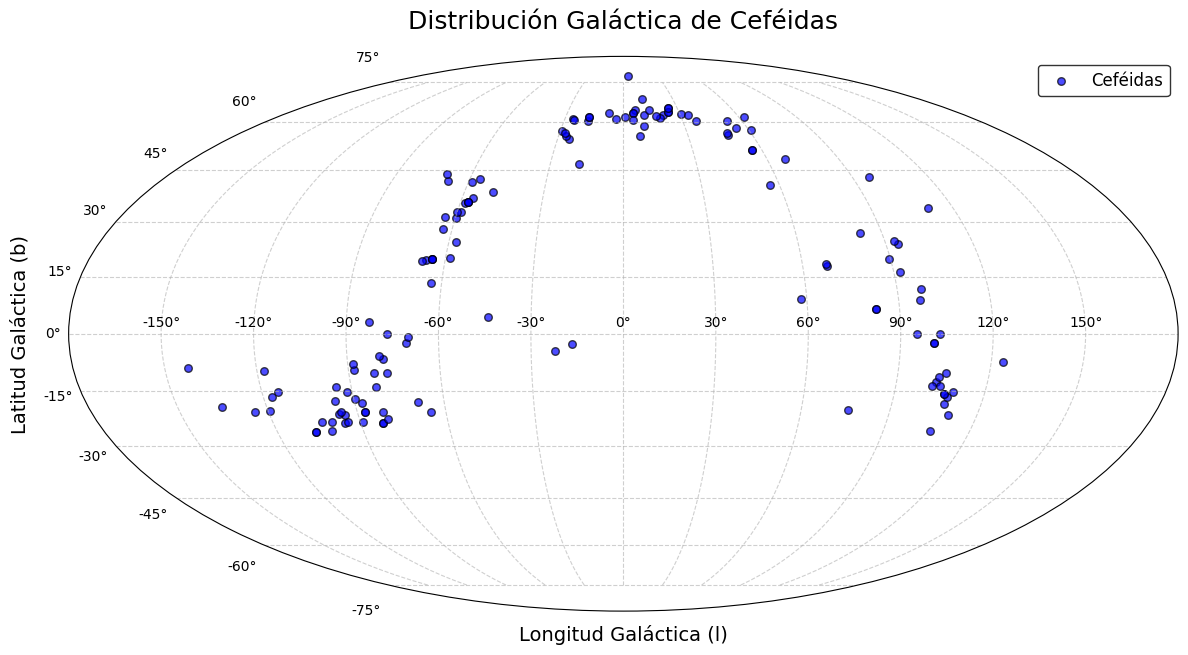

In [ ]:
# Asumiendo que CEPs y RRs son DataFrames que ya tienes cargados
cep_ar = CEPs["meanra"].values
cep_dec = CEPs["meandec"].values

rr_ar = RRs["meanra"].values
rr_dec = RRs["meandec"].values

def equatorial_to_galactic(ra, dec):
    """Convierte coordenadas ecuatoriales (RA, Dec) a galácticas (l, b)."""
    ra_rad = np.radians(ra)
    dec_rad = np.radians(dec)

    X_eq = np.cos(ra_rad) * np.cos(dec_rad)
    Y_eq = np.sin(ra_rad) * np.cos(dec_rad)
    Z_eq = np.sin(dec_rad)

    l_rad = np.arctan2(Y_eq, X_eq)
    b_rad = np.arcsin(Z_eq / np.sqrt(X_eq**2 + Y_eq**2 + Z_eq**2))

    l = np.degrees(l_rad)
    b = np.degrees(b_rad)

    return l, b

# Convertir las coordenadas de ambos tipos de estrellas
cep_l, cep_b = equatorial_to_galactic(cep_ar, cep_dec)
rr_l, rr_b = equatorial_to_galactic(rr_ar, rr_dec)

# Convertir a radianes para el gráfico en proyección galáctica
l_rad_cep = np.radians(cep_l)
b_rad_cep = np.radians(cep_b)

l_rad_rr = np.radians(rr_l)
b_rad_rr = np.radians(rr_b)

# Crear el gráfico mejorado
plt.figure(figsize=(12, 8))
ax = plt.subplot(111, projection="mollweide")  # Proyección Mollweide para mejor representación
ax.grid(True, linestyle='--', alpha=0.6)

# Graficar Ceféidas
scatter_cep = ax.scatter(
    l_rad_cep, b_rad_cep, c="blue", alpha=0.7, s=30, label="Ceféidas", edgecolor='black'
)

# Graficar RR Lyrae
#scatter_rr = ax.scatter(
    #l_rad_rr, b_rad_rr, c="orange", alpha=0.7, s=30, label="RR Lyrae", edgecolor='black'
#)

# Configurar el título, etiquetas y leyenda
plt.title("Distribución Galáctica de Ceféidas", fontsize=18, pad=20)
ax.set_xlabel("Longitud Galáctica (l)", fontsize=14, labelpad=10)
ax.set_ylabel("Latitud Galáctica (b)", fontsize=14, labelpad=10)

# Leyenda bien posicionada
plt.legend(loc="upper right", fontsize=12, frameon=True, edgecolor='black')

# Ajustar la visualización y mostrar
plt.tight_layout()
plt.show()

# ** Ver despues**

In [ ]:
def plot_light_curve(df, title='', period=None):
    def colormap(i):
        if i == 1:
            return '#56e03a'
        elif i == 2:
            return '#d42f4b'
        else:
            return '#000000'
    for fid in [1, 2]:
        fid_df = df[df.fid == fid]
        if len(fid_df) == 0:
            continue
        if period is not None:
            mjd = (fid_df.mjd % period) / period
        else:
            mjd = fid_df.mjd
        plt.errorbar(
            mjd,
            fid_df.magpsf,
            yerr=fid_df.sigmapsf,
            fmt='*',
            c=colormap(fid))
    plt.gca().invert_yaxis()
    if period is not None:
        plt.xlabel(f'Phase (period={period:.3f})')
    else:
        plt.xlabel('Date [mjd]')
    plt.ylabel('Apparent magnitude [mag]')
    plt.title(title)

In [ ]:
alerce_client = Alerce()
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:70% !important; }</style>"))
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from alerce.core import Alerce
import psycopg2
import json

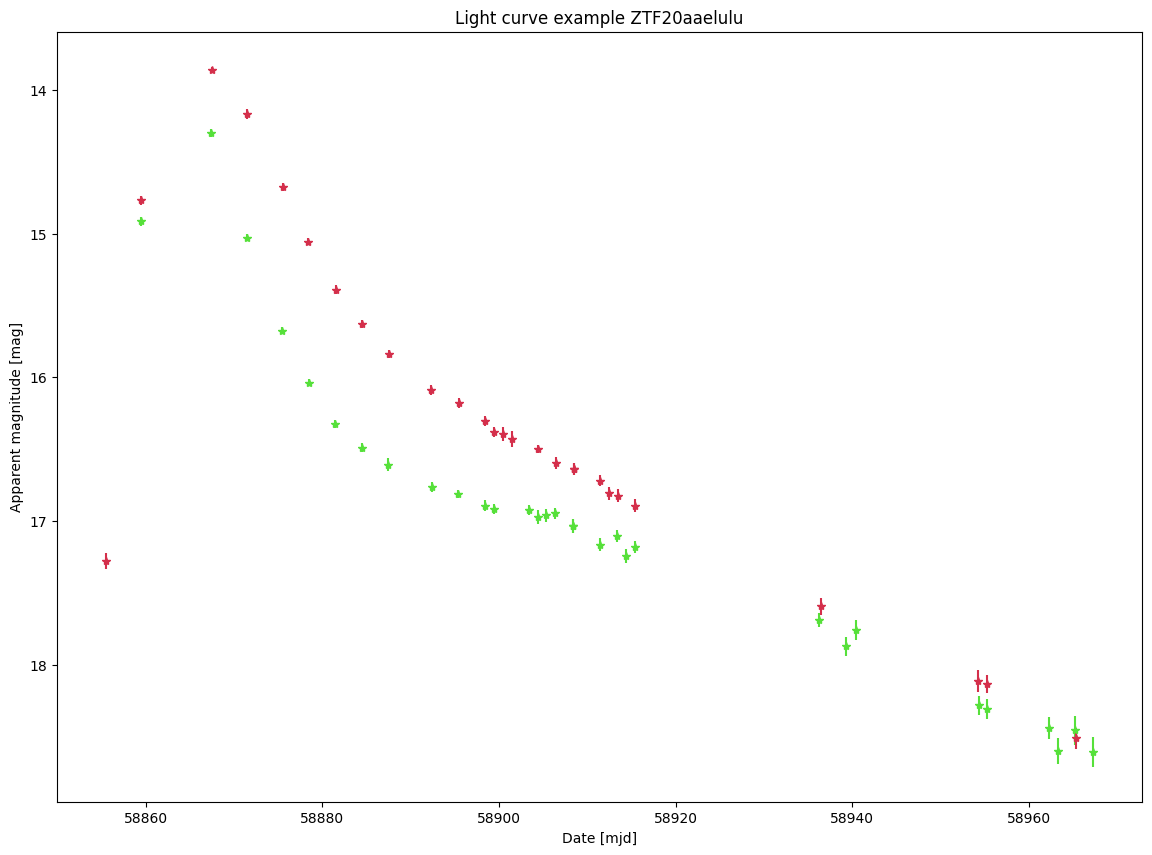

In [ ]:
fig = plt.figure(figsize=(14, 10))
fig.patch.set_facecolor('white')
oid = 'ZTF20aaelulu'
light_curve = alerce_client.query_detections(oid, format='pandas')
plot_light_curve(light_curve, title=f'Light curve example {oid}')

# **ALeRCE Explorer**

In [ ]:
!wget https://github.com/alercebroker/usecases/raw/master/alercereaduser_v4.json
!mv alercereaduser_v4.json ..
credentials_file = "../alercereaduser_v4.json"
with open(credentials_file) as jsonfile:
    params = json.load(jsonfile)["params"]
conn = psycopg2.connect(
    dbname=params['dbname'],
    user=params['user'],
    host=params['host'],
    password=params['password'])

--2025-01-26 06:51:53--  https://github.com/alercebroker/usecases/raw/master/alercereaduser_v4.json
Resolving github.com (github.com)... 140.82.114.4
Connecting to github.com (github.com)|140.82.114.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/alercebroker/usecases/master/alercereaduser_v4.json [following]
--2025-01-26 06:51:53--  https://raw.githubusercontent.com/alercebroker/usecases/master/alercereaduser_v4.json
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 156 [text/plain]
Saving to: ‘alercereaduser_v4.json’

alercereaduser_v4.j 100%[===================>]     156  --.-KB/s    in 0s      

2025-01-26 06:51:53 (4.16 MB/s) - ‘alercereaduser_v4.json’ saved [156/156]



In [ ]:
# Heavy query (~ 2 min)
query = "select * from probability where classifier_name = 'lc_classifier' and ranking = 1;"
bhrf_predictions = pd.read_sql_query(query, conn)
bhrf_predictions

<ipython-input-21-50577431335c>:3: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  bhrf_predictions = pd.read_sql_query(query, conn)


,oid,classifier_name,classifier_version,class_name,probability,ranking
0,ZTF19acreqbn,lc_classifier,hierarchical_rf_1.1.0,E,0.364320,1
1,ZTF19acrerry,lc_classifier,hierarchical_rf_1.1.0,E,0.298944,1
2,ZTF19acreqev,lc_classifier,hierarchical_rf_1.1.0,Periodic-Other,0.294140,1
3,ZTF18abzjqsz,lc_classifier,lc_classifier_1.1.13,Periodic-Other,0.352692,1
4,ZTF18acuxdvr,lc_classifier,lc_classifier_1.1.13,RRL,0.284700,1
...,...,...,...,...,...,...
3437477,ZTF19acrdqej,lc_classifier,hierarchical_rf_1.1.0,SNIa,0.570000,1
3437478,ZTF19acrdqel,lc_classifier,hierarchical_rf_1.1.0,Periodic-Other,0.545680,1
3437479,ZTF19acrdssc,lc_classifier,hierarchical_rf_1.1.0,LPV,0.369840,1
3437480,ZTF19acrdqas,lc_classifier,hierarchical_rf_1.1.0,E,0.228092,1


# **Query model predictions**

# Which objects have we found?

Text(0.5, 1.0, 'Predicted class frequency')

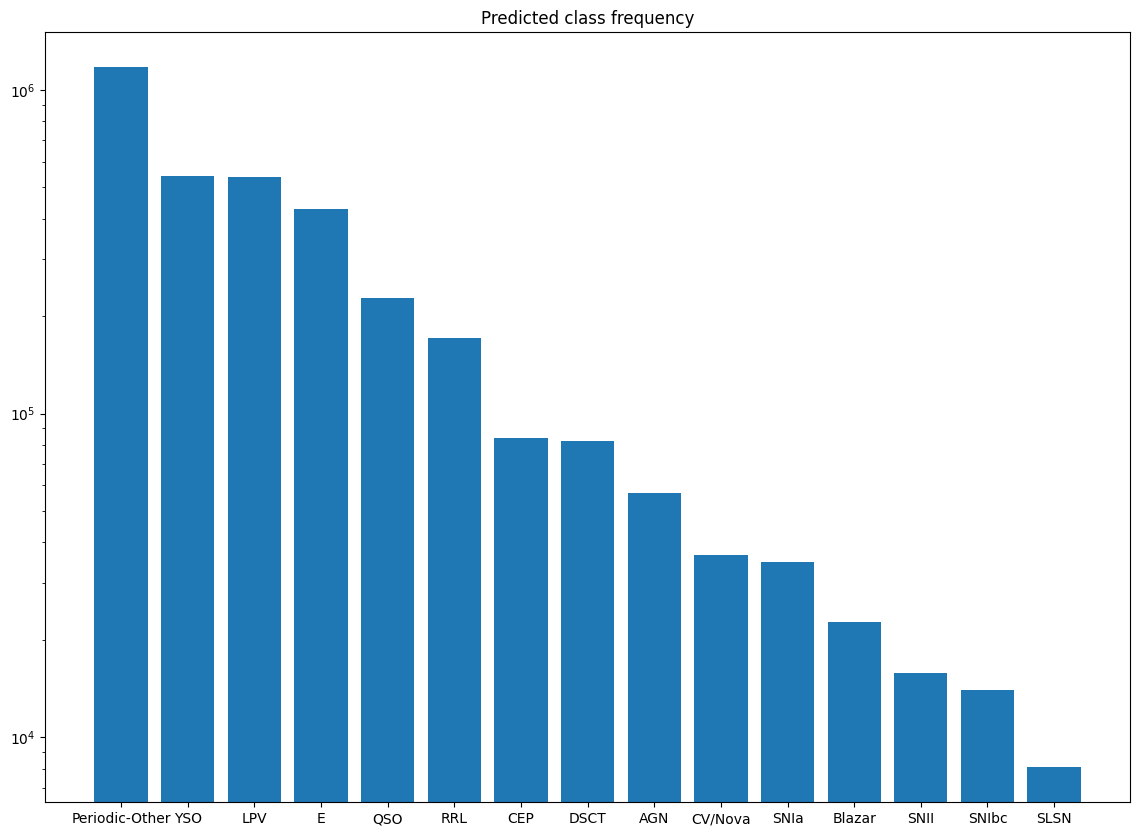

In [ ]:
pred_classes_count = bhrf_predictions.groupby('class_name').count()['oid']
pred_classes_count = pred_classes_count.sort_values(ascending=False)
fig = plt.figure(figsize=(14, 10))
fig.patch.set_facecolor('white')
plt.bar(pred_classes_count.index.values, pred_classes_count.values)
plt.gca().set_yscale('log')
plt.title('Predicted class frequency')

# Spatial distribution of the predictions

Galactic sources (LPV, CEP, YSO)

In [ ]:
galactic_sources = bhrf_predictions[bhrf_predictions['class_name'].isin(
    ['LPV', 'CEP', 'YSO'])]
galactic_sources

,oid,classifier_name,classifier_version,class_name,probability,ranking
5,ZTF19acreqst,lc_classifier,hierarchical_rf_1.1.0,LPV,0.976108,1
30,ZTF19aabizjs,lc_classifier,lc_classifier_1.1.13,YSO,0.673184,1
55,ZTF19acrjppu,lc_classifier,hierarchical_rf_1.1.0,YSO,0.443300,1
61,ZTF19acrkxld,lc_classifier,hierarchical_rf_1.1.0,YSO,0.301644,1
64,ZTF19acrlfqf,lc_classifier,hierarchical_rf_1.1.0,LPV,0.779064,1
...,...,...,...,...,...,...
3437467,ZTF19acrdxri,lc_classifier,hierarchical_rf_1.1.0,LPV,0.624360,1
3437469,ZTF18adkfhdm,lc_classifier,lc_classifier_1.1.13,YSO,0.477224,1
3437470,ZTF19acrecwp,lc_classifier,hierarchical_rf_1.1.0,YSO,0.308632,1
3437475,ZTF19acawqnt,lc_classifier,lc_classifier_1.1.13,YSO,0.374796,1


In [ ]:
# Instead of using set_session, try executing a query to set the timeout
cursor = conn.cursor()
cursor.execute("SET statement_timeout TO '900s'")  # Setting timeout to 900 seconds
conn.commit()  # Commit the change

# Now proceed with your query
query = "select oid, name, value from feature where name = 'gal_l' or name = 'gal_b';"
features = pd.read_sql_query(query, conn)
features


<ipython-input-29-4e102f7c3946>:8: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  features = pd.read_sql_query(query, conn)


,oid,name,value
0,ZTF19aargwjd,gal_b,4.166083
1,ZTF19aargwjd,gal_l,9.798493
2,ZTF20abmctuf,gal_b,-18.397653
3,ZTF20abmctuf,gal_l,86.174406
4,ZTF18abgsptz,gal_b,1.409847
...,...,...,...
9956821,ZTF20aamlgvv,gal_b,4.064604
9956822,ZTF20aamlgvv,gal_l,43.117468
9956823,ZTF18aayejll,gal_b,4.603210
9956824,ZTF18aayejll,gal_l,43.550960


In [ ]:
gal_l = features[features.name == 'gal_l'].copy()
gal_l.rename(columns={'value': 'gal_l'}, inplace=True)
gal_l.drop(columns=['name'], inplace=True)
gal_l.set_index('oid', inplace=True)

gal_b = features[features.name == 'gal_b'].copy()
gal_b.rename(columns={'value': 'gal_b'}, inplace=True)
gal_b.drop(columns=['name'], inplace=True)
gal_b.set_index('oid', inplace=True)


In [ ]:
# Reset the index of both DataFrames to default integer index
gal_l = gal_l.reset_index()
gal_b = gal_b.reset_index()

# Perform the merge operation based on the common 'oid' column
coordinates = pd.merge(gal_l, gal_b, on='oid', how='inner')

# If you want 'oid' as the index again:
coordinates = coordinates.set_index('oid')

coordinates

,gal_l,gal_b
oid,,
ZTF19aargwjd,9.798493,4.166083
ZTF19aargwjd,9.798493,4.166086
ZTF19aargwjd,9.798493,4.166093
ZTF20abmctuf,86.174406,-18.397653
ZTF20abmctuf,86.174406,-18.397658
...,...,...
ZTF18aayejll,43.550960,4.603212
ZTF18aayejll,43.550960,4.603210
ZTF18abpaljf,42.972729,4.357658


In [ ]:
n_per_class = 1000  # sample size
replace = False  # with replacement
fn = lambda obj: obj.loc[np.random.choice(obj.index, n_per_class, replace),:]
galactic_sources_subset = galactic_sources.groupby('class_name', as_index=False).apply(fn)
galactic_sources_subset = galactic_sources_subset.droplevel(level=0)
galactic_sources_subset

<ipython-input-35-24d5a429f703>:4: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  galactic_sources_subset = galactic_sources.groupby('class_name', as_index=False).apply(fn)


,oid,classifier_name,classifier_version,class_name,probability,ranking
1928054,ZTF18acvpvkf,lc_classifier,hierarchical_rf_1.1.0,CEP,0.469260,1
2758711,ZTF18aajtldq,lc_classifier,lc_classifier_1.1.13,CEP,0.264000,1
107357,ZTF20acqwbgj,lc_classifier,hierarchical_rf_1.1.0,CEP,0.249064,1
1709937,ZTF18abwugfz,lc_classifier,hierarchical_rf_1.1.0,CEP,0.246768,1
2582856,ZTF18abimfwv,lc_classifier,lc_classifier_1.1.13,CEP,0.393668,1
...,...,...,...,...,...,...
2817181,ZTF18abclmon,lc_classifier,lc_classifier_1.1.13,YSO,0.184116,1
2188903,ZTF24aaatxex,lc_classifier,lc_classifier_1.1.13,YSO,0.203680,1
3182839,ZTF18acfdrcw,lc_classifier,hierarchical_rf_1.1.0,YSO,0.443304,1
1607612,ZTF18abcqkwi,lc_classifier,hierarchical_rf_1.1.0,YSO,0.315988,1


Text(0.5, 1.0, 'Spatial distribution of predictions: LPV, CEP, YSO')

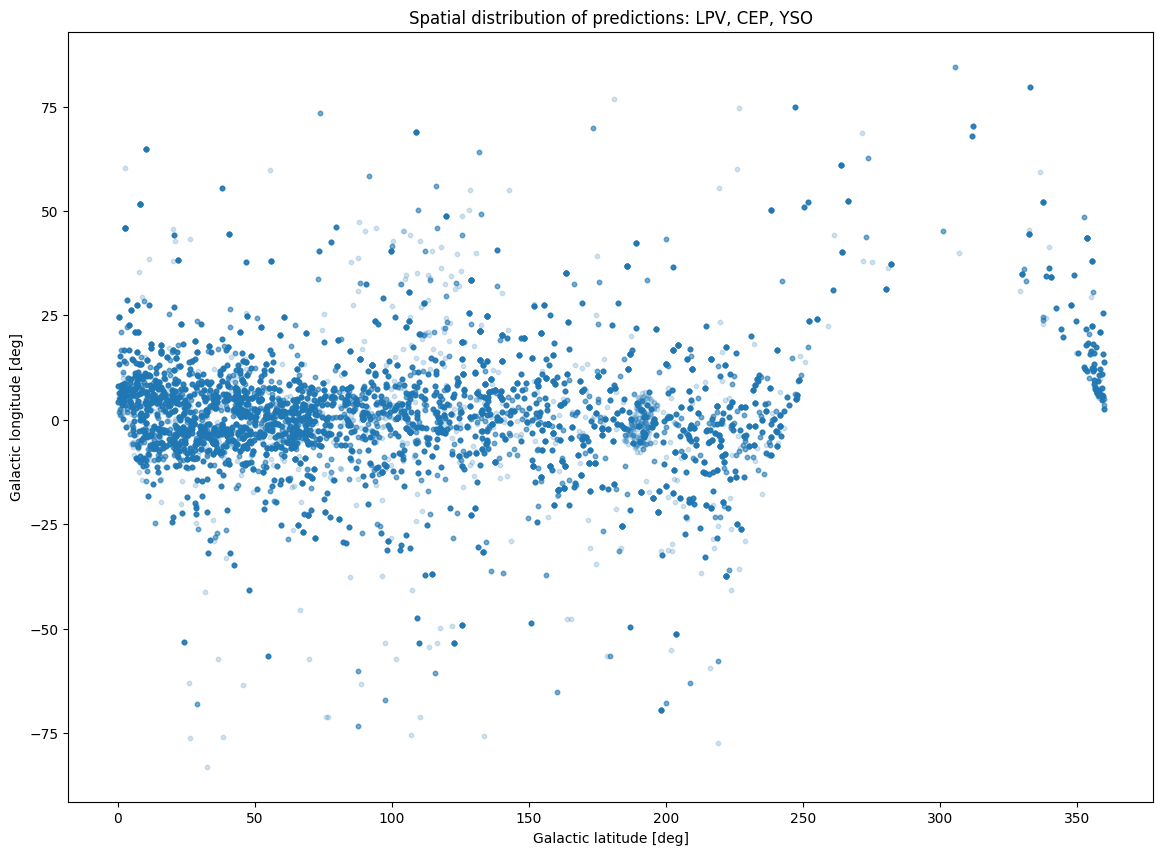

In [ ]:
coordinates_subset = coordinates.loc[galactic_sources_subset.oid]
fig = plt.figure(figsize=(14, 10))
fig.patch.set_facecolor('white')
plt.scatter(coordinates_subset.values[:, 0],coordinates_subset.values[:, 1],alpha=0.2,s=10)
plt.xlabel('Galactic latitude [deg]')
plt.ylabel('Galactic longitude [deg]')
plt.title('Spatial distribution of predictions: LPV, CEP, YSO')

Extragalactic sources (QSO, AGN, Blazar, SNe)


In [ ]:
extragalactic_sources = bhrf_predictions[bhrf_predictions['class_name'].isin(
    ['QSO', 'Blazar', 'SNIa', 'SNII', 'AGN', 'SNIbc', 'SLSN'])]
extragalactic_sources

,oid,classifier_name,classifier_version,class_name,probability,ranking
14,ZTF19acrhacm,lc_classifier,hierarchical_rf_1.1.0,QSO,0.838632,1
15,ZTF19acrgzzi,lc_classifier,hierarchical_rf_1.1.0,QSO,0.600000,1
18,ZTF19acrhgpb,lc_classifier,hierarchical_rf_1.1.0,QSO,0.838000,1
20,ZTF19acrhhho,lc_classifier,hierarchical_rf_1.1.0,QSO,0.688620,1
21,ZTF19acrhncx,lc_classifier,hierarchical_rf_1.1.0,QSO,0.866264,1
...,...,...,...,...,...,...
3437462,ZTF19acrdpwj,lc_classifier,hierarchical_rf_1.1.0,SNIbc,0.218416,1
3437463,ZTF19acrehdw,lc_classifier,hierarchical_rf_1.1.0,SLSN,0.118200,1
3437464,ZTF19acrdxaa,lc_classifier,hierarchical_rf_1.1.0,SNIbc,0.169400,1
3437474,ZTF19acrenwk,lc_classifier,hierarchical_rf_1.1.0,SNIa,0.400392,1


In [ ]:
n_per_class = 100  # sample size
replace = False  # with replacement
fn = lambda obj: obj.loc[np.random.choice(obj.index, n_per_class, replace),:]
extragalactic_sources_subset = extragalactic_sources.groupby('class_name', as_index=False).apply(fn)
extragalactic_sources_subset = extragalactic_sources_subset.droplevel(level=0)
extragalactic_sources_subset

<ipython-input-43-57bcb6fe4a9a>:4: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  extragalactic_sources_subset = extragalactic_sources.groupby('class_name', as_index=False).apply(fn)


,oid,classifier_name,classifier_version,class_name,probability,ranking
2422949,ZTF18acljjaa,lc_classifier,lc_classifier_1.1.13,AGN,0.451232,1
26209,ZTF20aafdkzx,lc_classifier,hierarchical_rf_1.1.0,AGN,0.828144,1
1038285,ZTF19aaspdza,lc_classifier,hierarchical_rf_1.1.0,AGN,0.276588,1
2097142,ZTF19aailnzn,lc_classifier,lc_classifier_1.1.13,AGN,0.557960,1
2052250,ZTF18abwcpml,lc_classifier,hierarchical_rf_1.1.0,AGN,0.167400,1
...,...,...,...,...,...,...
2405224,ZTF19abxbvaw,lc_classifier,lc_classifier_1.1.13,SNIbc,0.242864,1
1515629,ZTF20acrejza,lc_classifier,hierarchical_rf_1.1.0,SNIbc,0.165680,1
1335845,ZTF22aalwbjf,lc_classifier,hierarchical_rf_1.1.0,SNIbc,0.372504,1
967681,ZTF23abbfmxe,lc_classifier,hierarchical_rf_1.1.0,SNIbc,0.245952,1


Text(0.5, 1.0, 'Spatial distribution of extragalactic pred. sources')

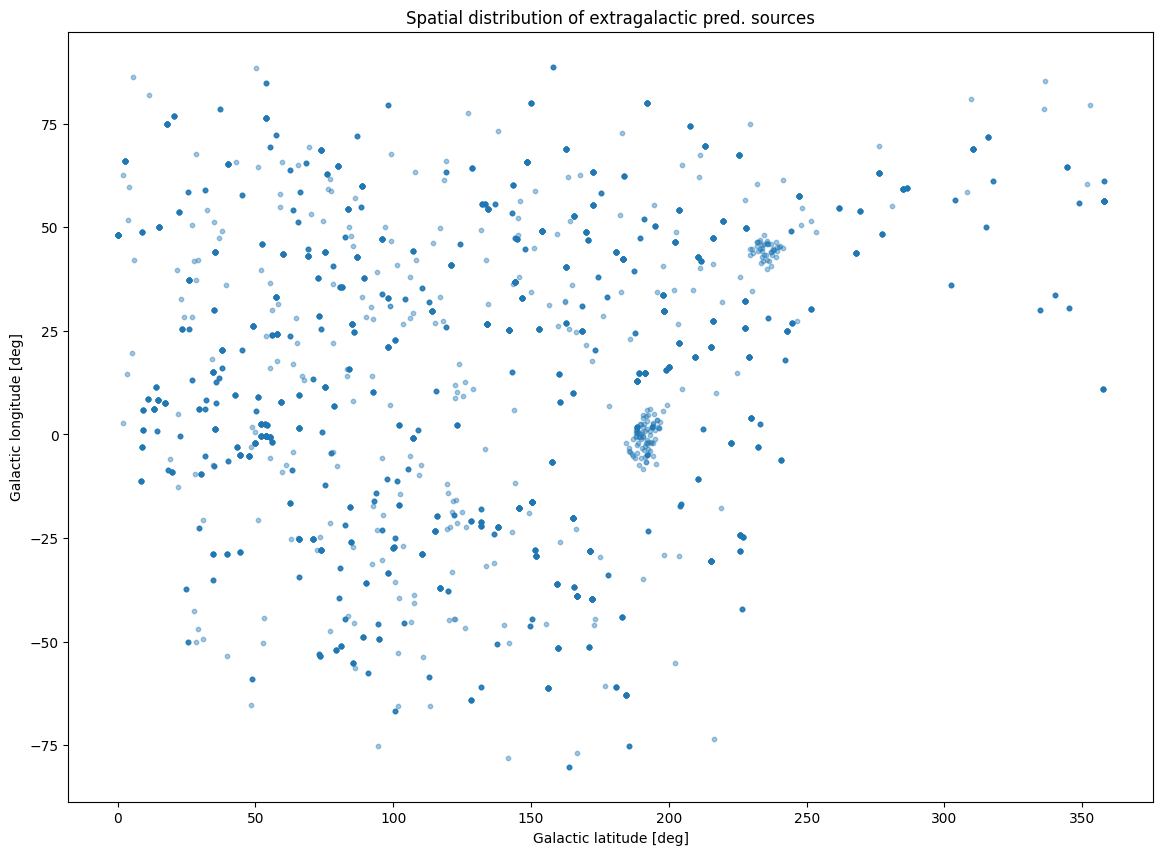

In [ ]:
coordinates_subset = coordinates.loc[extragalactic_sources_subset.oid]
fig = plt.figure(figsize=(14, 10))
fig.patch.set_facecolor('white')
plt.scatter(
    coordinates_subset.values[:, 0],
    coordinates_subset.values[:, 1],
    alpha=0.4,
    s=10
)
plt.xlabel('Galactic latitude [deg]')
plt.ylabel('Galactic longitude [deg]')
plt.title('Spatial distribution of extragalactic pred. sources')

# **Visualizing a sample of predicted objects**

In [ ]:
n_per_class = 1  # sample size
minimum_probability = 0.3
replace = False  # with replacement
fn = lambda obj: obj.loc[np.random.choice(obj.index, n_per_class, replace),:]
filtered_bhrf_predictions = bhrf_predictions[bhrf_predictions.probability >= minimum_probability]
sample_per_class = filtered_bhrf_predictions.groupby('class_name', as_index=False).apply(fn)
sample_per_class = sample_per_class.droplevel(level=0)
sample_per_class

<ipython-input-46-980b65f65695>:6: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  sample_per_class = filtered_bhrf_predictions.groupby('class_name', as_index=False).apply(fn)


,oid,classifier_name,classifier_version,class_name,probability,ranking
3265072,ZTF19abegvkv,lc_classifier,hierarchical_rf_1.1.0,AGN,0.424116,1
45983,ZTF18abhrhts,lc_classifier,lc_classifier_1.1.13,Blazar,0.350448,1
2476413,ZTF18acdlvnq,lc_classifier,hierarchical_rf_1.1.0,CEP,0.313608,1
1148027,ZTF18aboshoe,lc_classifier,hierarchical_rf_1.1.0,CV/Nova,0.304580,1
2993280,ZTF18abdikiz,lc_classifier,hierarchical_rf_1.1.0,DSCT,0.330676,1
3194318,ZTF18acsbehw,lc_classifier,hierarchical_rf_1.1.0,E,0.575452,1
2346365,ZTF18adlfoir,lc_classifier,lc_classifier_1.1.13,LPV,0.671040,1
774844,ZTF19aadufnx,lc_classifier,hierarchical_rf_1.1.0,Periodic-Other,0.356136,1
1028588,ZTF22aaiasmd,lc_classifier,hierarchical_rf_1.1.0,QSO,0.815652,1
1985761,ZTF18aaaaohq,lc_classifier,hierarchical_rf_1.1.0,RRL,0.302328,1


<ipython-input-47-fe3b2c9296e7>:11: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  period_df = pd.read_sql_query(query, conn)


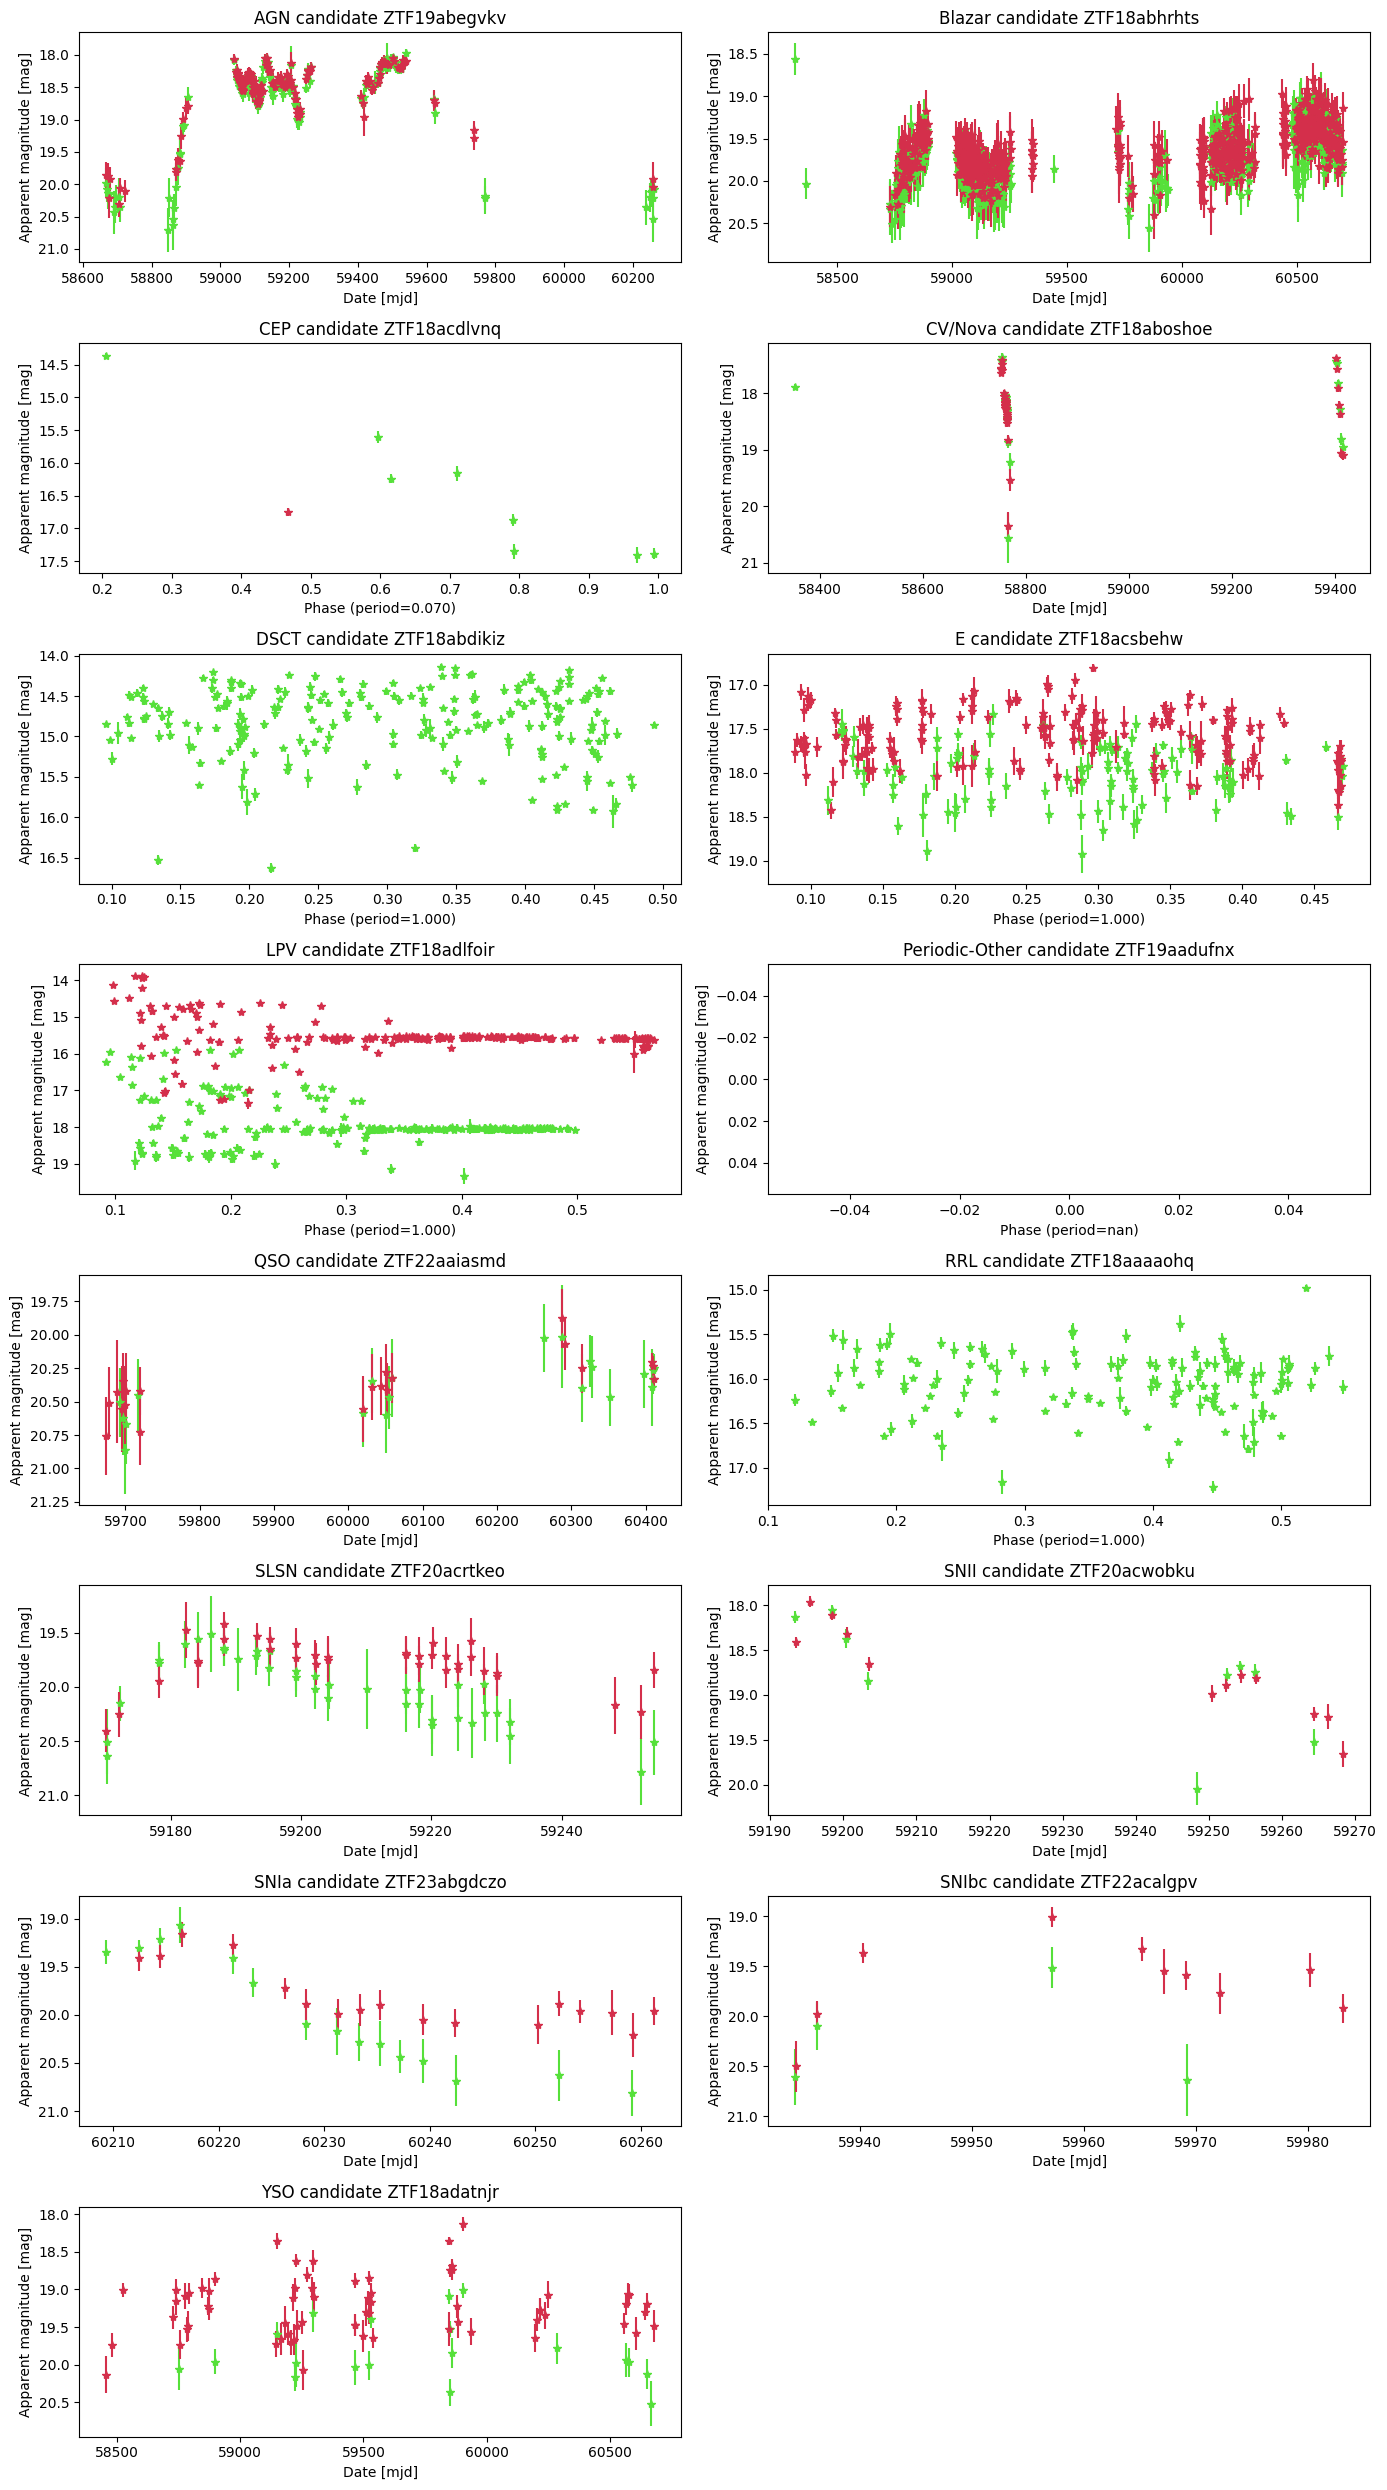

In [ ]:
fig = plt.figure(figsize=(14, 25))
fig.patch.set_facecolor('white')
for index in range(len(sample_per_class)):
    astro_class = sample_per_class['class_name'].values[index]
    oid = sample_per_class['oid'].values[index]
    light_curve = alerce_client.query_detections(oid, format='pandas')
    plt.subplot(8, 2, index+1)
    period = None
    if astro_class in ['CEP', 'E', 'DSCT', 'LPV', 'Periodic-Other', 'RRL']:
        query = f"select oid, name, value from feature where name = 'Multiband_period' and oid = '{oid}';"
        period_df = pd.read_sql_query(query, conn)
        if len(period_df) > 0:
            period = float(period_df.value.values[0])
    plot_light_curve(light_curve, title=f'{astro_class} candidate {oid}', period=period)
plt.tight_layout()